In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
import Boundary_Functions as bf

#from sklearn.externals.joblib import Parallel, delayed
#import multiprocessing

#num_cores=multiprocessing.cpu_count()#NotebookApp.iopub_data_rate_limit=10000000000

start = timeit.default_timer()

In [2]:
M0=1.0
ru0=5.0
dr0v=.4#*(32*M0**(3.0)/ru0*mth.exp(-ru0/(2.0*M0)))**(1.0)
N=20
umax=12
vmax=10
du0=M0/N
dv0=du0

#N=M0/du0

Nu=int(N*umax)
Nv=int(N*vmax)

numpoints=Nu*Nv
print(str(numpoints)+" points")

print("Runtime: about "+str(format(numpoints/(17530*60),'.2f'))+" minutes")
print(Nu, Nv)

48000 points
Runtime: about 0.05 minutes
240 200


In [3]:
rlistu=5.0+bf.dr2(M0,dr0v,ru0)*np.arange(0,umax,du0)
rlistv=5.0+dr0v*np.arange(0,vmax,dv0)

print(rlistu)

ulist=np.empty((Nu))
vlist=np.empty((Nv))

for i in range(0,Nu):
    ulist[i]=bf.rbounschinv(M0,ru0,bf.dr2(M0,dr0v,ru0)*bf.esig(M0,rlistu[0]),rlistu[i])
    
for j in range(0,Nv):
    vlist[j]=bf.rbounschinv(M0,ru0,dr0v*bf.esig(M0,rlistu[0]),rlistv[j])
    
#print(ulist)

[ 5.       4.98125  4.9625   4.94375  4.925    4.90625  4.8875   4.86875
  4.85     4.83125  4.8125   4.79375  4.775    4.75625  4.7375   4.71875
  4.7      4.68125  4.6625   4.64375  4.625    4.60625  4.5875   4.56875
  4.55     4.53125  4.5125   4.49375  4.475    4.45625  4.4375   4.41875
  4.4      4.38125  4.3625   4.34375  4.325    4.30625  4.2875   4.26875
  4.25     4.23125  4.2125   4.19375  4.175    4.15625  4.1375   4.11875
  4.1      4.08125  4.0625   4.04375  4.025    4.00625  3.9875   3.96875
  3.95     3.93125  3.9125   3.89375  3.875    3.85625  3.8375   3.81875
  3.8      3.78125  3.7625   3.74375  3.725    3.70625  3.6875   3.66875
  3.65     3.63125  3.6125   3.59375  3.575    3.55625  3.5375   3.51875
  3.5      3.48125  3.4625   3.44375  3.425    3.40625  3.3875   3.36875
  3.35     3.33125  3.3125   3.29375  3.275    3.25625  3.2375   3.21875
  3.2      3.18125  3.1625   3.14375  3.125    3.10625  3.0875   3.06875
  3.05     3.03125  3.0125   2.99375  2.975    2.95

In [4]:
rlist=np.zeros((Nu,Nv))*np.nan

print(bf.rsch(M0,ru0,dr0v,ulist[0],0))

for i in range(0,Nv):
    rlist[i][0]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[0])


for j in range(0,Nv):
    rlist[0][j]=bf.rsch(M0,ru0,dr0v,ulist[0],vlist[j])
    
print(rlist[:,0])
print(rlist[0,:])

5.0
[ 5.       4.98125  4.9625   4.94375  4.925    4.90625  4.8875   4.86875
  4.85     4.83125  4.8125   4.79375  4.775    4.75625  4.7375   4.71875
  4.7      4.68125  4.6625   4.64375  4.625    4.60625  4.5875   4.56875
  4.55     4.53125  4.5125   4.49375  4.475    4.45625  4.4375   4.41875
  4.4      4.38125  4.3625   4.34375  4.325    4.30625  4.2875   4.26875
  4.25     4.23125  4.2125   4.19375  4.175    4.15625  4.1375   4.11875
  4.1      4.08125  4.0625   4.04375  4.025    4.00625  3.9875   3.96875
  3.95     3.93125  3.9125   3.89375  3.875    3.85625  3.8375   3.81875
  3.8      3.78125  3.7625   3.74375  3.725    3.70625  3.6875   3.66875
  3.65     3.63125  3.6125   3.59375  3.575    3.55625  3.5375   3.51875
  3.5      3.48125  3.4625   3.44375  3.425    3.40625  3.3875   3.36875
  3.35     3.33125  3.3125   3.29375  3.275    3.25625  3.2375   3.21875
  3.2      3.18125  3.1625   3.14375  3.125    3.10625  3.0875   3.06875
  3.05     3.03125  3.0125   2.99375  2.975    

In [5]:
rlist=np.zeros((Nu,Nv))*np.nan

for i in range(0,Nu):
    for j in range(0,Nv):
        rlist[i][j]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
        if rlist[i][j]>0.0:
            continue
        else:
            rlist[i][j]=np.nan
            break
            

rlist=np.zeros((Nu))*np.nan
#rlist=np.zeros((Nu,Nv))*np.nan

#rlist=bf.rsch(M0,ru0,dr0v,ulist,vlist)

#for i in range(0,Nu):
rlist=Parallel(n_jobs=num_cores)(delayed(bf.rsch)(M0,ru0,dr0v,ulist[i],vlist[j]) for i in range(0,Nu) for j in range(0,Nv))
 
print(rlist)

def first():
    with open('rsch_out1.txt','a') as f:
        for j in range(0,int(Nv/2)):
            for i in range(0,int(Nu/2)):
                res = bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
                f.write(str(res))
                #rlist[i][j]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])

def second():
    with open('rsch_out2.txt','a') as f:
        for j in range(0,int(Nv/2)):
            for i in range(int(Nu/2),Nu):
                res=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
                f.write(str(res))

if __name__ == '__main__':
    proc1 = multiprocessing.Process(target=first, args=())
    proc2 = multiprocessing.Process(target=second, args=())
    proc1.start()
    proc2.start()
    #proc1.join()
    #proc2.join()
#first()
#second()

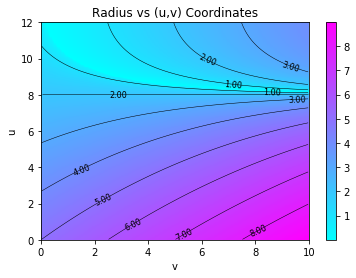

In [6]:
levels=np.arange(0.0, np.nanmax(rlist), 1.0 )

plot1=plt.imshow(rlist,cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot4=plt.contour(rlist, levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels,  
           inline=0, inline_spacing=0, 
           fmt='%1.2f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim()
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('Test1-2.png',dpi=300)
plt.show()

In [7]:
urange0=np.zeros((Nu))
vrange0=np.zeros((Nv))

dt=du0
for i in range(0,Nu-1):
    r=rlist[i][0]
    #esig=32*M0**(3.0)/r*mth.exp(-r/(2*M0))
    try:
        urange0[i+1]=urange0[i]+dt
    except OverflowError:
        urange0[i+1]=np.nan
for j in range(0,Nv-1):
    r=rlist[0][j]
    #esig=32*M0**3/r*mth.exp(-r/(2*M0))
    try:
        vrange0[j+1]=vrange0[j]+dt
    except OverflowError:
        vrange0[j+1]=np.nan
    
    
print(urange0)

[  0.     0.05   0.1    0.15   0.2    0.25   0.3    0.35   0.4    0.45
   0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95   1.
   1.05   1.1    1.15   1.2    1.25   1.3    1.35   1.4    1.45   1.5
   1.55   1.6    1.65   1.7    1.75   1.8    1.85   1.9    1.95   2.     2.05
   2.1    2.15   2.2    2.25   2.3    2.35   2.4    2.45   2.5    2.55
   2.6    2.65   2.7    2.75   2.8    2.85   2.9    2.95   3.     3.05
   3.1    3.15   3.2    3.25   3.3    3.35   3.4    3.45   3.5    3.55
   3.6    3.65   3.7    3.75   3.8    3.85   3.9    3.95   4.     4.05
   4.1    4.15   4.2    4.25   4.3    4.35   4.4    4.45   4.5    4.55
   4.6    4.65   4.7    4.75   4.8    4.85   4.9    4.95   5.     5.05
   5.1    5.15   5.2    5.25   5.3    5.35   5.4    5.45   5.5    5.55
   5.6    5.65   5.7    5.75   5.8    5.85   5.9    5.95   6.     6.05
   6.1    6.15   6.2    6.25   6.3    6.35   6.4    6.45   6.5    6.55
   6.6    6.65   6.7    6.75   6.8    6.85   6.9    6.95   7.     

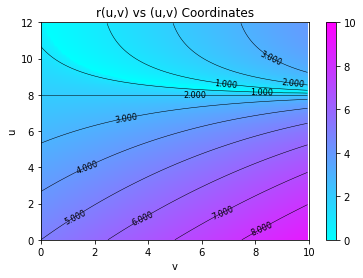

In [8]:
rlistm=np.ma.masked_invalid(rlist)

plot1=plt.pcolormesh(vrange0,urange0,rlist,cmap=plt.cm.cool,vmin=0.0,vmax=10.0)#np.nanmax(rlist))
plot4=plt.contour(vrange0,urange0,rlist, levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels, inline=0, inline_spacing=0, fmt='%1.3f',rightside_up=True, fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,vmax)
plt.ylim(0,umax)
#plt.ylim(7.95,8.2)
#plt.ylim(0,np.nanmax(urange[-1]))
plt.colorbar(plot1)
plt.title('r(u,v) vs (u,v) Coordinates')
#plt.grid()
#plt.savefig('Test.png',dpi=300)
plt.show()

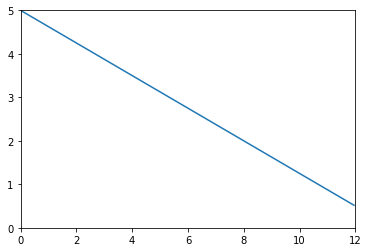

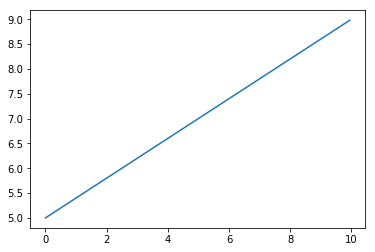

In [9]:
plt.plot(urange0,rlist[:,0])
plt.xlim(0,umax)
plt.ylim(0,5)
plt.show()

plt.plot(vrange0,rlist[0,:])
plt.show()

In [10]:
print(rlist[:,0])
print((rlist[1,0]-rlist[0,0])/(urange0[1]-urange0[0]))
der1=(rlist[11,0]-rlist[10,0])/(urange0[11]-urange0[10])
print(der1)


[ 5.       4.98125  4.9625   4.94375  4.925    4.90625  4.8875   4.86875
  4.85     4.83125  4.8125   4.79375  4.775    4.75625  4.7375   4.71875
  4.7      4.68125  4.6625   4.64375  4.625    4.60625  4.5875   4.56875
  4.55     4.53125  4.5125   4.49375  4.475    4.45625  4.4375   4.41875
  4.4      4.38125  4.3625   4.34375  4.325    4.30625  4.2875   4.26875
  4.25     4.23125  4.2125   4.19375  4.175    4.15625  4.1375   4.11875
  4.1      4.08125  4.0625   4.04375  4.025    4.00625  3.9875   3.96875
  3.95     3.93125  3.9125   3.89375  3.875    3.85625  3.8375   3.81875
  3.8      3.78125  3.7625   3.74375  3.725    3.70625  3.6875   3.66875
  3.65     3.63125  3.6125   3.59375  3.575    3.55625  3.5375   3.51875
  3.5      3.48125  3.4625   3.44375  3.425    3.40625  3.3875   3.36875
  3.35     3.33125  3.3125   3.29375  3.275    3.25625  3.2375   3.21875
  3.2      3.18125  3.1625   3.14375  3.125    3.10625  3.0875   3.06875
  3.05     3.03125  3.0125   2.99375  2.975    2.95

In [11]:
print(rlist[0,:])
print((rlist[0,1]-rlist[0,0])/(vrange0[1]-vrange0[0]))
der2=(rlist[0,11]-rlist[0,10])/(vrange0[11]-vrange0[10])
print(der2)

[ 5.    5.02  5.04  5.06  5.08  5.1   5.12  5.14  5.16  5.18  5.2   5.22
  5.24  5.26  5.28  5.3   5.32  5.34  5.36  5.38  5.4   5.42  5.44  5.46
  5.48  5.5   5.52  5.54  5.56  5.58  5.6   5.62  5.64  5.66  5.68  5.7
  5.72  5.74  5.76  5.78  5.8   5.82  5.84  5.86  5.88  5.9   5.92  5.94
  5.96  5.98  6.    6.02  6.04  6.06  6.08  6.1   6.12  6.14  6.16  6.18
  6.2   6.22  6.24  6.26  6.28  6.3   6.32  6.34  6.36  6.38  6.4   6.42
  6.44  6.46  6.48  6.5   6.52  6.54  6.56  6.58  6.6   6.62  6.64  6.66
  6.68  6.7   6.72  6.74  6.76  6.78  6.8   6.82  6.84  6.86  6.88  6.9
  6.92  6.94  6.96  6.98  7.    7.02  7.04  7.06  7.08  7.1   7.12  7.14
  7.16  7.18  7.2   7.22  7.24  7.26  7.28  7.3   7.32  7.34  7.36  7.38
  7.4   7.42  7.44  7.46  7.48  7.5   7.52  7.54  7.56  7.58  7.6   7.62
  7.64  7.66  7.68  7.7   7.72  7.74  7.76  7.78  7.8   7.82  7.84  7.86
  7.88  7.9   7.92  7.94  7.96  7.98  8.    8.02  8.04  8.06  8.08  8.1
  8.12  8.14  8.16  8.18  8.2   8.22  8.24  8.26  8.28

In [12]:
print(.4/N)
print(bf.dr(M0,.4,5)/N)
print(-1.0/(4.0*.4)*(1.0-2.0/5.0)/N)

0.02
-0.009850199834867856
-0.01875


In [13]:
print(bf.drbounsch(M0,ru0,-.375,20))

0.181401781346


In [14]:
print(32/5*mth.exp(-5/2)*der1)
print(32/5*mth.exp(-5/2)*der2)

-0.197003996697
0.210137596477


In [15]:
print(bf.rbounschinv(M0,ru0,.5,5.1))

0.207152319013


In [16]:
stop = timeit.default_timer()

print(str(stop - start)+' seconds')
print(str((stop - start)/60)+' minutes')
print(str((stop - start)/3600)+' hours')

print(str((numpoints)/(stop - start))+' points per second')

3.975149973241921 seconds
0.06625249955403202 minutes
0.0011042083259005335 hours
12075.016118411691 points per second
